In [122]:
import pandas as pd17222

df = pd.read_excel('DH_source_data.xlsx')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Url       1990 non-null   object        
 1   Likes     1990 non-null   int64         
 2   Reposts   1990 non-null   int64         
 3   Comments  1990 non-null   int64         
 4   Views     1990 non-null   int64         
 5   ER        1990 non-null   float64       
 6   Text      1990 non-null   object        
 7   Date      1990 non-null   datetime64[ns]
 8   Author    1990 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 140.1+ KB


# Корреляция Пирсона

In [110]:
# Сгруппируем по дате (а именно по неделям) средние значения и суммы поля Комментарии. Запишем данные в переменные

temp_mean_comments = df.groupby(df['Date'].dt.isocalendar().week)['Comments'].mean().rename('Mean_comments')
temp_sum_comments = df.groupby(df['Date'].dt.isocalendar().week)['Comments'].sum().rename('Sum_comments')
temp_mean_reposts = df.groupby(df['Date'].dt.isocalendar().week)['Reposts'].mean().rename('Mean_reposts')
temp_sum_reposts = df.groupby(df['Date'].dt.isocalendar().week)['Reposts'].sum().rename('Sum_reposts')

In [111]:
# Сделаем общую таблицу на основе агрегированных значений 

comments_reposts_agg = pd.concat([temp_mean_comments, temp_sum_comments, 
                                  temp_mean_reposts, temp_sum_reposts], axis=1)
comments_reposts_agg

,Mean_comments,Sum_comments,Mean_reposts,Sum_reposts
week,,,,
1,117.000000,1170,241.900000,2419
2,47.212121,1558,130.545455,4308
3,53.540000,2677,112.640000,5632
4,43.234043,2032,127.510638,5993
5,65.909091,2900,122.113636,5373
6,58.000000,2494,134.906977,5801
7,68.590909,3018,127.500000,5610
8,75.425532,3545,114.957447,5403
9,71.586957,3293,133.021739,6119


In [112]:
# Вычислим корреляцию Пирсона по описательным статистикам

corr_comments_reposts_agg = comments_reposts_agg.corr()

# Удалим дубликаты сравнений колонок

corr_comments_reposts_agg = corr_comments_reposts_agg.unstack().sort_values(ascending=False).drop_duplicates()
corr_comments_reposts_agg

Mean_comments  Mean_comments    1.000000
Mean_reposts   Sum_reposts      0.584302
Mean_comments  Sum_comments     0.568941
Sum_comments   Sum_reposts      0.204318
Mean_comments  Mean_reposts    -0.059050
Sum_comments   Mean_reposts    -0.174970
Mean_comments  Sum_reposts     -0.454934
dtype: float64

<Axes: xlabel='Mean_reposts', ylabel='Sum_reposts'>

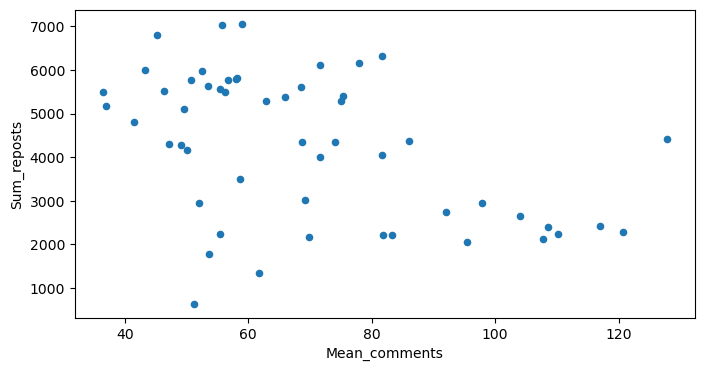

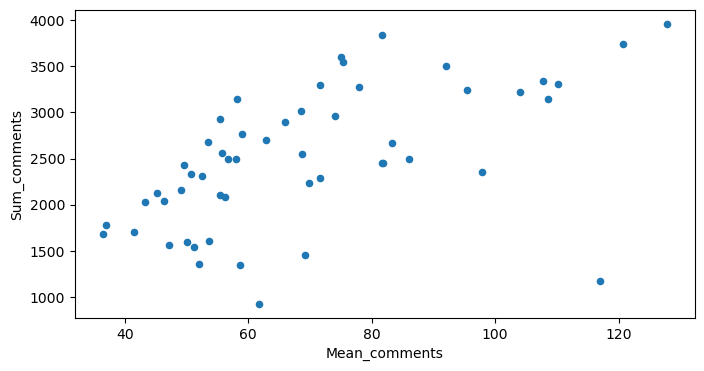

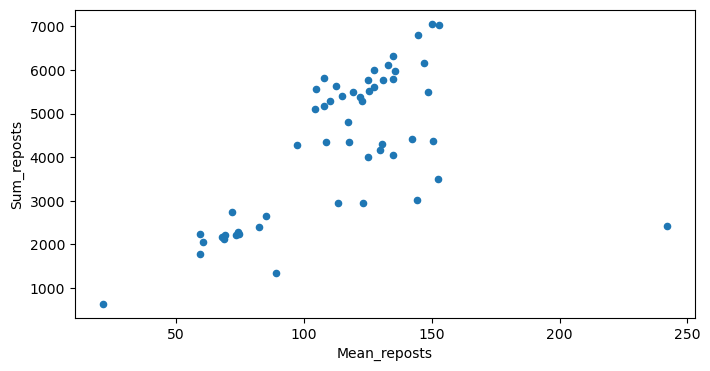

In [113]:
# Построим график рассеяния для тех корреляций где есть зависимость

comments_reposts_agg.plot('Mean_comments', 'Sum_reposts', figsize=(8, 4), kind='scatter')
comments_reposts_agg.plot('Mean_comments', 'Sum_comments', figsize=(8, 4), kind='scatter')
comments_reposts_agg.plot('Mean_reposts', 'Sum_reposts', figsize=(8, 4), kind='scatter')

<Axes: xlabel='Mean_comments', ylabel='Mean_reposts'>

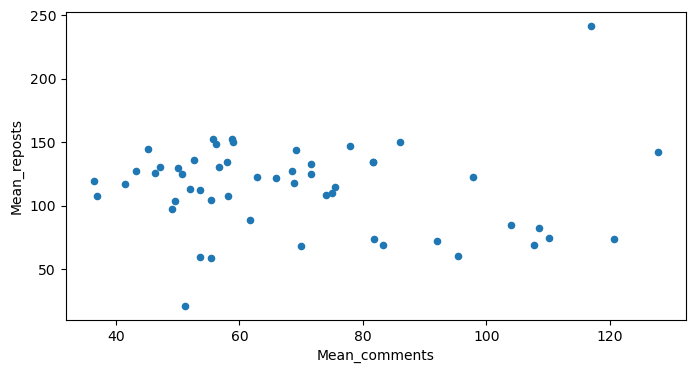

In [114]:
# Оказывается что между средним кол-вом комментариев и средним кол-вом репостов почти нет взаимосвязи.
# Можно было предположить обратное, т.к. оба критерия "сложные", т.е. нужно приложить некое человеческое "усилие".
comments_reposts_agg.plot('Mean_comments', 'Mean_reposts', figsize=(8, 4), kind='scatter')

## Произведем те же вычисления, но только по месяцам, а не по неделям. Посмотрим как изменится результат.

In [115]:
month_mean_comments = df.groupby(df['Date'].dt.month)['Comments'].mean().rename('Mean_comments')
month_sum_comments = df.groupby(df['Date'].dt.month)['Comments'].sum().rename('Sum_comments')
month_mean_reposts = df.groupby(df['Date'].dt.month)['Reposts'].mean().rename('Mean_reposts')
month_sum_reposts = df.groupby(df['Date'].dt.month)['Reposts'].sum().rename('Sum_reposts')

In [116]:
month_comments_reposts_agg = pd.concat([month_mean_comments, month_sum_comments, 
                                  month_mean_reposts, month_sum_reposts], axis=1)
month_comments_reposts_agg

,Mean_comments,Sum_comments,Mean_reposts,Sum_reposts
Date,,,,
1,53.601351,7933,136.175676,20154
2,67.174157,11957,124.646067,22187
3,66.705000,13341,135.700000,27140
4,61.207071,12119,130.181818,25776
5,52.512315,10660,121.566502,24678
6,51.955224,10443,115.865672,23289
7,54.178771,9698,122.284916,21889
8,77.732759,9017,128.129310,14863
9,70.316901,9985,100.683099,14297


In [117]:
corr_month_agg = month_comments_reposts_agg.corr().unstack().sort_values(ascending=False).drop_duplicates()
corr_month_agg

# Взаимосвязь местами весьма сильная.

Mean_comments  Mean_comments    1.000000
Mean_reposts   Sum_reposts      0.845779
Mean_comments  Sum_comments     0.576739
Sum_comments   Sum_reposts     -0.067869
               Mean_reposts    -0.423377
Mean_comments  Mean_reposts    -0.762625
               Sum_reposts     -0.801000
dtype: float64

<Axes: xlabel='Mean_reposts', ylabel='Sum_reposts'>

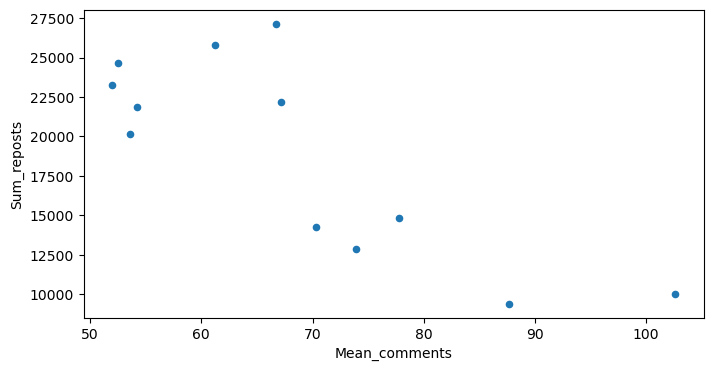

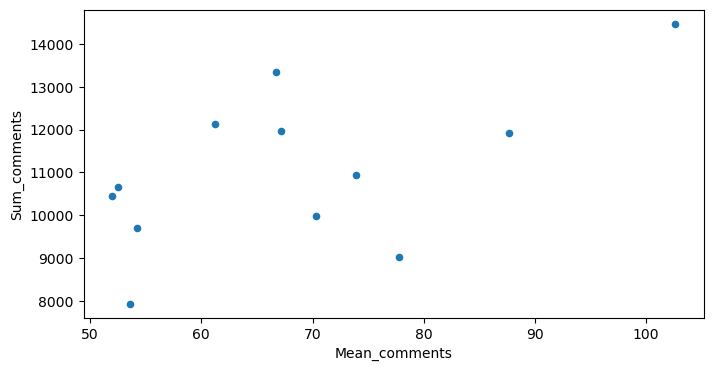

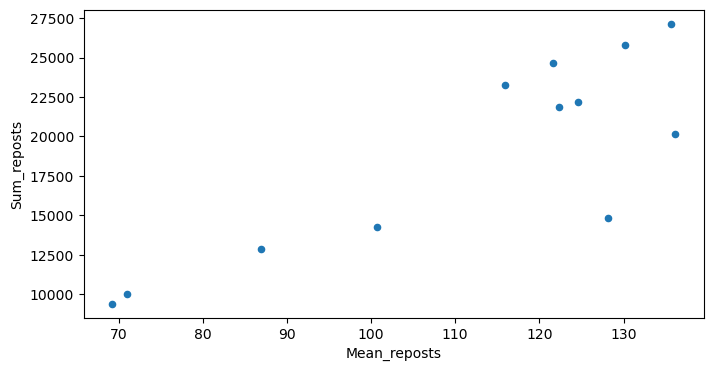

In [118]:
month_comments_reposts_agg.plot('Mean_comments', 'Sum_reposts', figsize=(8, 4), kind='scatter')
month_comments_reposts_agg.plot('Mean_comments', 'Sum_comments', figsize=(8, 4), kind='scatter')
month_comments_reposts_agg.plot('Mean_reposts', 'Sum_reposts', figsize=(8, 4), kind='scatter')

## Проверим, есть ли корреляция между столбцами исходного датасета (без вычисления агрегатов)

In [119]:
# Вычислим корреляцию Пирсона по всему датасету. 
df.corr(method='pearson', numeric_only=True).unstack().sort_values(ascending=False)

Likes     Likes       1.000000
Reposts   Reposts     1.000000
Views     Views       1.000000
Comments  Comments    1.000000
ER        ER          1.000000
          Likes       0.976639
Likes     ER          0.976639
Views     ER          0.870033
ER        Views       0.870033
Views     Likes       0.857646
Likes     Views       0.857646
Reposts   ER          0.746504
ER        Reposts     0.746504
Likes     Reposts     0.659383
Reposts   Likes       0.659383
Views     Reposts     0.626312
Reposts   Views       0.626312
ER        Comments    0.619908
Comments  ER          0.619908
Views     Comments    0.531253
Comments  Views       0.531253
Likes     Comments    0.492798
Comments  Likes       0.492798
          Reposts     0.293442
Reposts   Comments    0.293442
dtype: float64

In [120]:
# Теперь удалим дубликаты сравнений колонок
# Видим что корреляций очень много!
df_correlation = df.corr(method='pearson', numeric_only=True).unstack().sort_values(ascending=False)
df_correlation.drop_duplicates()

Likes     Likes       1.000000
ER        Likes       0.976639
Views     ER          0.870033
          Likes       0.857646
Reposts   ER          0.746504
Likes     Reposts     0.659383
Views     Reposts     0.626312
ER        Comments    0.619908
Views     Comments    0.531253
Likes     Comments    0.492798
Comments  Reposts     0.293442
dtype: float64

<Axes: xlabel='Comments', ylabel='Reposts'>

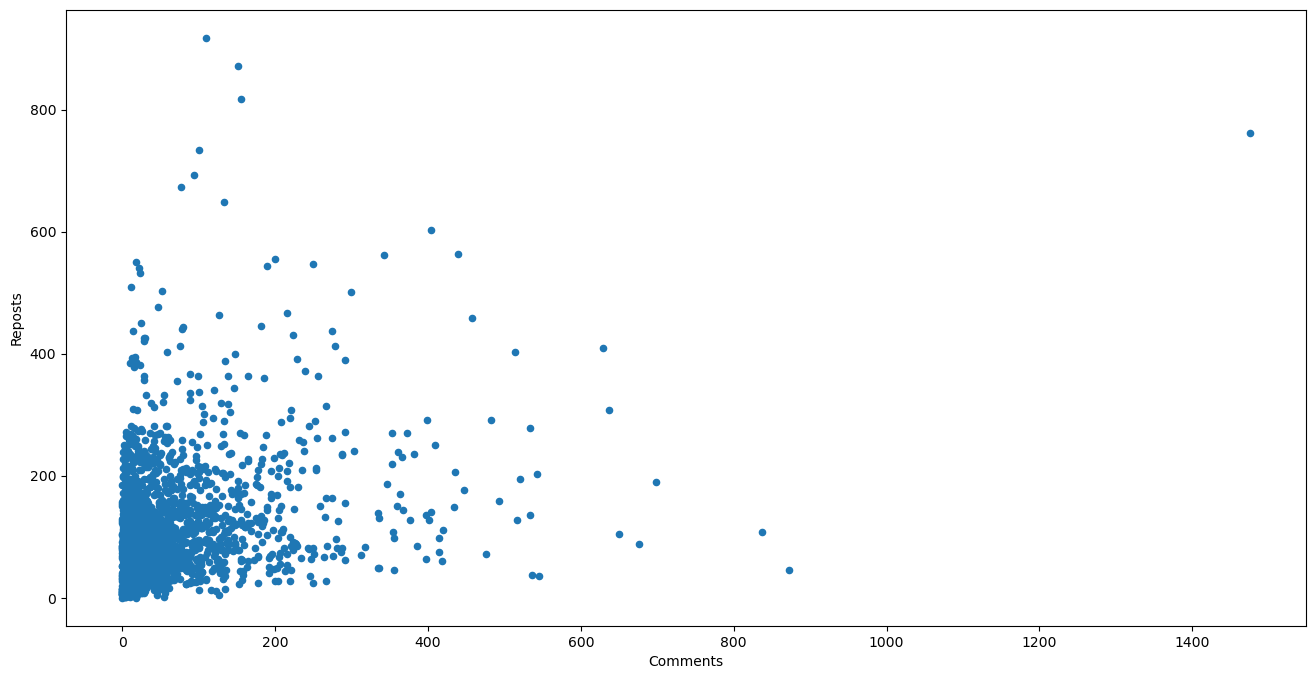

In [121]:
# Корреляция Пирсона показала что между комментариями и репостами существует слабая зависимость.
# Анализ средних вечилин коммендов и репостов показал, что взаимосвязь между ними почти отсутсвует. 
# Построим график рассеяния для комментов и репостов
df.plot('Comments', 'Reposts', figsize=(16, 8), kind='scatter')